### Utrecht in The Netherland
The dataset starts from 2017-01-01 to 2017-02-28.

In [1]:
import pandas as pd

# Specify the file path
file_path = 'datasets/journeys.tsv'

# Read the TSV file into a pandas DataFrame
df_utrecht = pd.read_csv(file_path, sep='\t', header=None)

# Remove the last column
df_utrecht = df_utrecht.drop(columns=df_utrecht.columns[-1])

# Set the column names
df_utrecht.columns = ["card_id", "start_time", "end_time", "origin", "destination"]

# df_utrecht['start_time'] = pd.to_datetime(df_utrecht['start_time'])
# df_utrecht['end_time'] = pd.to_datetime(df_utrecht['end_time'])

In [2]:
df_utrecht.head(10)

,card_id,start_time,end_time,origin,destination
0,2891638867820331400,3-1-2017 11:10,3-1-2017 11:12,Jaarbeurs,Janskerkhof
1,2891638867820331400,3-1-2017 13:20,3-1-2017 13:22,Janskerkhof,Jaarbeurs
2,2891638867820331400,4-1-2017 12:05,4-1-2017 12:07,Jaarbeurs,Nijenoord
3,2891638867820331400,4-1-2017 17:47,4-1-2017 17:49,Nijenoord,Jaarbeurs
4,2891638867820331400,5-1-2017 7:57,5-1-2017 7:58,Jaarbeurs,Twijnstraat
5,2891638867820331400,5-1-2017 16:52,5-1-2017 16:53,Twijnstraat,Jaarbeurs
6,2891638867820331400,6-1-2017 9:53,6-1-2017 9:59,Jaarbeurs,UMC Utrecht
7,2891638867820331400,6-1-2017 12:10,6-1-2017 12:17,UMC Utrecht,Jaarbeurs
8,2891638867820331400,7-1-2017 14:03,7-1-2017 14:04,Jaarbeurs,Oudegracht Winkels en Restaurants
9,2891638867820331400,7-1-2017 23:04,7-1-2017 23:05,Oudegracht Winkels en Restaurants,Jaarbeurs


#### Number of Cardholders

In [2]:
print("Number of cardholders:", df_utrecht['card_id'].nunique())

Number of cardholders: 200000


In [5]:
utrecht_card_id_count = df_utrecht['card_id'].value_counts()
utrecht_card_id_count

6234185716562345253    125
5805968829105626586    123
1086286808524226336    122
5829337626495953017    122
7603558967793413000    122
                      ... 
6916555389651010672    100
4294674859647674855    100
7626897122917329533    100
5068618087165745352    100
2367116031601218529    100
Name: card_id, Length: 200000, dtype: int64

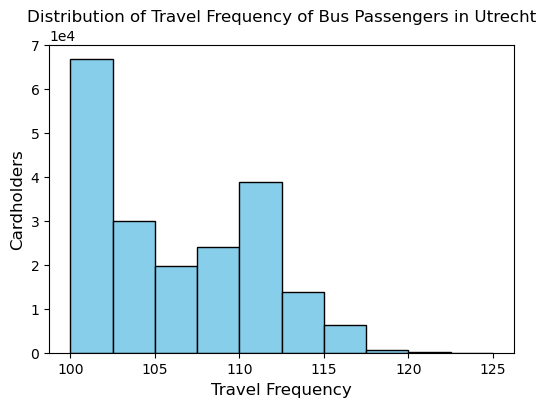

In [16]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the histogram
utrecht_card_id_count.plot(kind='hist', color='skyblue', edgecolor='black')

# Set the labels and title
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)
plt.title('Distribution of Travel Frequency of Bus Passengers in Utrecht', fontsize=12)

# Set y-axis tick labels in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add grid lines
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure as 'output.png'
plt.savefig('figs/utrecht_travel_freq.png')

# Show the plot
plt.show()


### Shenzhen Metro
The data spans from 2014-06-09 to 2014-06-13

In [ ]:
import pandas as pd
import glob

# Specify the folder path
folder_path = 'raw data/DT_GJC_地铁站刷卡数据/'

# Get a list of all .csv files in the folder
csv_files = glob.glob(folder_path + '*.csv')

# Initialize an empty list to store the dataframes
dfs_SZ = []

# Loop through each .csv file and read it into a dataframe
for file in csv_files:
    df_SZ = pd.read_csv(file, encoding='gbk', header=None, sep=',')
    dfs_SZ.append(df_SZ)

# Concatenate the dataframes into a single dataframe
combined_df_SZ = pd.concat(dfs_SZ, ignore_index=True)

combined_df_SZ.columns = ["card_id", "fee", "actual_fee", "time", "route","station","train_id","status"]

# Convert the "time" column to timestamp
combined_df_SZ['time'] = pd.to_datetime(combined_df_SZ['time'])


#### Numer of total transactions

In [3]:
combined_df_SZ[combined_df_SZ.status == '进站']

,card_id,fee,actual_fee,time,route,station,train_id,status
37,880001627,0,0.0,2014-06-09 00:00:05,地铁一号线,会展中心站,OGT-136,进站
38,880200292,0,0.0,2014-06-09 00:01:24,地铁三号线,大运,AGM-105,进站
39,880015200,0,0.0,2014-06-09 00:02:16,地铁五号线,塘朗,AGT-111,进站
40,880010124,0,0.0,2014-06-09 00:04:06,地铁二号线,东角头,IGT-111,进站
41,880016050,0,0.0,2014-06-09 00:03:58,地铁二号线,燕南,IGT-110,进站
...,...,...,...,...,...,...,...,...
16294810,294311396,0,0.0,2014-06-13 19:37:16,地铁二号线,东角头,IGT-109,进站
16294811,327057456,0,0.0,2014-06-13 21:23:47,地铁二号线,东角头,IGT-111,进站
16294812,290838579,0,0.0,2014-06-13 08:38:39,地铁二号线,湾厦,IGT-107,进站
16294813,322324063,0,0.0,2014-06-13 08:39:06,地铁二号线,湾厦,IGT-109,进站


In [4]:
print("Number of cardholders:", combined_df_SZ['card_id'].nunique())

Number of cardholders: 2091578


In [5]:
card_id_count_SZ = combined_df_SZ[combined_df_SZ.status == '进站']['card_id'].value_counts()
card_id_count_SZ

322567749    68
880202774    62
880018085    59
880008030    56
880201660    54
             ..
20471450      1
290996219     1
360728479     1
326898653     1
291409530     1
Name: card_id, Length: 2089536, dtype: int64

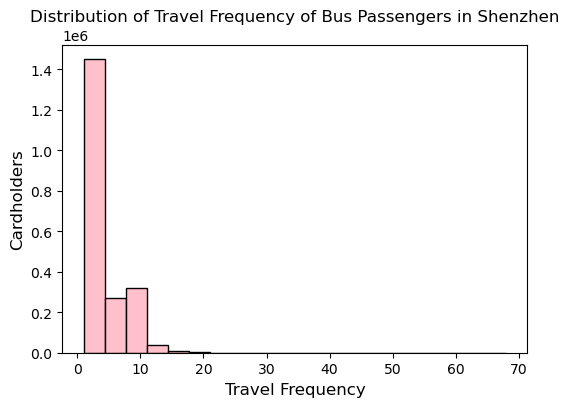

In [9]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the histogram with more bins
card_id_count_SZ.plot(kind='hist', color='pink', edgecolor='black', bins=20)

# Set the labels and title
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)
plt.title('Distribution of Travel Frequency of Bus Passengers in Shenzhen', fontsize=12)

# Set y-axis tick labels in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save the figure as 'output.png'
plt.savefig('figs/Shenzhen_travel_freq.png')

# Show the plot
plt.show()
